In [ ]:
%load_ext autoreload
%autoreload 2

import crispr as cr
from crispr.class_sc import Omics
import pertpy as pt
import pandas as pd
import numpy as np
from config import (
    files_data, assays_data, col_cell_type_data, col_gene_symbols_data,
    col_perturbed_data, col_condition_data, key_control_data, 
    key_treatment_data, col_split_by_data, col_batch_data, col_sample_id_data, 
    kws_process_guide_rna_data, col_guide_rna_data, col_num_umis_data)

pd.options.display.max_columns = 100

# Options
skip_preprocessing_clustering = False  # to skip these steps
print(dir(cr.ax))
file = "coda"
file_path = pt.dt.haber_2017_regions()

#  Set Arguments
kws_umap = dict(min_dist=0.3)  # passed to UMAP fx
if file in assays_data:
    if isinstance(assays_data[file], str) or assays_data[file] is None:
        assays_data[file] = [assays_data[file], None]
    assay, assay_protein = assays_data[file]
else:
    assay, assay_protein = None
col_split_by = col_split_by_data[file]
kwargs_init = dict(assay=assay, assay_protein=assay_protein,
                   col_gene_symbols=col_gene_symbols_data[file],  
                   col_cell_type=col_cell_type_data[file], 
                   col_sample_id=col_sample_id_data[file], 
                   col_batch=col_batch_data[file],
                   col_perturbed=col_perturbed_data[file], 
                   col_guide_rna=col_guide_rna_data[file], 
                   col_num_umis=col_num_umis_data[file],
                   kws_process_guide_rna={
                       **kws_process_guide_rna_data[file],
                       "remove_multi_transfected": True} if (
                           kws_process_guide_rna_data[file]) else None,
                   col_condition=col_condition_data[file], 
                   key_control=key_control_data[file], 
                   key_treatment=key_treatment_data[file])
print(file_path)
print(f"Initialization arguments (from config):\n\n{kwargs_init}")
kws_pp = {"kws_hvg": {"min_mean": 0.0125, "max_mean": 10, 
                      "min_disp": 0.5, "flavor": "cell_ranger"}, 
          "target_sum": 10000.0, "cell_filter_pmt": [0, 15], 
          "cell_filter_ngene": [200, None], 
          "cell_filter_ncounts": [3, 40000], 
          "gene_filter_ncell": [3, None], "regress_out": None, 
          "kws_scale": "log", "kws_umap": kws_umap}
kws_cluster = {"method_cluster": "leiden", "kws_umap": kws_umap, 
               "kws_neighbors": None, 
               "kws_pca": {"n_comps": None, "use_highly_variable": True}, 
               "kws_cluster": {"resolution": 0.5}}
print(f"UMAP Keywords: {kws_umap}\n\n")

# Single-Cell Omics Object Initialization

In [ ]:
self = Omics(file_path, **kwargs_init)



<<< INITIALIZING CRISPR CLASS OBJECT >>>


Unused keyword arguments: {'col_batch': 'batch', 'col_perturbed': 'condition', 'col_guide_rna': nan, 'col_num_umis': nan, 'kws_process_guide_rna': None}.


<<< LOADING OBJECT >>>


Cell Counts: Raw

9842


Gene Counts: Raw



 AnnData object with n_obs × n_vars = 9842 × 15215
    obs: 'batch', 'barcode', 'condition', 'cell_label'
    layers: 'counts'



col_gene_symbols='index'
col_cell_type='cell_label'
col_sample_id='batch'
col_batch='batch'
col_condition='condition'
key_control='Control'
key_treatment='Salmonella'


 AnnData object with n_obs × n_vars = 9842 × 15215
    obs: 'batch', 'barcode', 'condition', 'cell_label'
    layers: 'counts'


# Composition Analysis


Un-used Keyword Arguments: {'col_gene_symbols': 'index', 'col_batch': 'batch'}
['condition']
MuData object with n_obs × n_vars = 9852 × 15223
  2 modalities
    rna:	9842 x 15215
      obs:	'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'
      layers:	'counts'
    coda:	10 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'


Automatic reference selection! Reference cell type set to TA.Early

MuData object with n_obs × n_vars = 9852 × 15223
  2 modalities
    rna:	9842 x 15215
      obs:	'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'
      layers:	'counts'
    coda:	10 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
[[ 36.  59. 136.  36. 239. 125. 191.  18.]
 [ 32. 373. 116.  67. 117.  65. 168.  12.]
 [  5.  46.  23.  20.  50.  11.  40.   5.]
 [ 45.  98. 188. 124. 250. 155. 365.  33.]
 [ 26. 221. 198.  36. 131. 130. 196.   4.]
 [ 52.  75. 347.  66. 323. 263. 313.  51.]
 [ 65. 126. 115.  33.  65.  39. 129.  59.]
 [ 42.  71. 203. 147. 271. 109. 180. 146.]
 [ 40.  57. 383. 170. 321. 244. 256.  71.]
 [ 37. 332. 113.  59.  90.  47. 132.  10.]]
                    condition batch
scCODA_sample_id                   
B1                    Control    B1
B10                Salmonella   B10
B2                    Control    B2
B3                    Control    B3
B4                    

sample: 100%|██████████| 11000/11000 [00:35<00:00, 312.46it/s, 127 steps of size 2.20e-02. acc. prob=0.78]


                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 10 samples, 8 cell types                                    │
│ Reference cell type                         │ TA.Early                                                          │
│ Formula                                     │ condition                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                        Final Parameter  Expected Sample                                                         │
│ Cell Type                                                                                                       │
│ Endocrine                  0.932            46.149                                                              │
│ Enterocyte                 1.863           117.082                                                              │
│ Enterocyte.Progenitor      2.311           183.254                                                              │
│ Goblet                     1.439            76.621                                                              │
│ Stem                       2.382           196.738                                                              │
│ TA                         1.843           114.764                                                              │
│ TA.Early                   2.475           215.913                                                              │
│ Tuft                       0.617            33.679                                                              │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                               Final Parameter  Expected Sample  log2-fold change                │
│ Covariate              Cell Type                                                                                │
│ conditionT.Hpoly.Day3  Endocrine                  0.000            46.149             0.000                     │
│                        Enterocyte                 0.000           117.082             0.000                     │
│                        Enterocyte.Progenitor      0.000           183.254             0.000                     │
│                        Goblet                     0.000            76.621             0.000                     │
│                        Stem                       0.000           196.738             0.000                     │
│                        TA                         0.000           114.764             0.000                     │
│                        TA.Early                   0.000           215.913             0.000                     │
│                        Tuft                       0.000            33.679             0.000                     │
│ conditionT.Hpoly.Day10 Endocrine                  0.000            46.149             0.000                     │
│                        Enterocyte                 0.000           117.082             0.000                     │
│                        Enterocyte.Progenitor      0.000           183.254             0.000                     │
│                        Goblet                     0.000            76.621             0.000                     │
│                        Stem                       0.000           196.738             0.000                     │
│                        TA                         0.000           114.764             0.000                     │
│                        TA.Early                   0.000           215.913             0.000                     │
│                        Tuft                       0.000            33.679             0.000                     │
│ conditionT.Salmonella  Endocrine                  0.000            32.150            -0.521                     │
│                        Enterocyte                 1.539           380.116             1.699                     │
│                        Enterocyte.Progenitor      0.000           127.665            -0.521                     │
│                        Goblet                     0.000            53.379            -0.521                     │
│                        Stem                       0.000           137.059            -0.521                     │
│                        TA                         0.000            79.951            -0.521                     │
│                        TA.Early                   0.000           150.417            -0.521                     │
│                        Tuft                       0.000            23.463            -0.521                     │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 10 samples, 8 cell types                                    │
│ Reference cell type                         │ TA.Early                                                          │
│ Formula                                     │ condition                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                        Final Parameter  Expected Sample                                                         │
│ Cell Type                                                                                                       │
│ Endocrine                  0.932            46.149                                                              │
│ Enterocyte                 1.863           117.082                                                              │
│ Enterocyte.Progenitor      2.311           183.254                                                              │
│ Goblet                     1.439            76.621                                                              │
│ Stem                       2.382           196.738                                                              │
│ TA                         1.843           114.764                                                              │
│ TA.Early                   2.475           215.913                                                              │
│ Tuft                       0.617            33.679                                                              │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                               Final Parameter  Expected Sample  log2-fold change                │
│ Covariate              Cell Type                                                                                │
│ conditionT.Hpoly.Day3  Endocrine                  0.000            46.149             0.000                     │
│                        Enterocyte                 0.000           117.082             0.000                     │
│                        Enterocyte.Progenitor      0.000           183.254             0.000                     │
│                        Goblet                     0.000            76.621             0.000                     │
│                        Stem                       0.000           196.738             0.000                     │
│                        TA                         0.000           114.764             0.000                     │
│                        TA.Early                   0.000           215.913             0.000                     │
│                        Tuft                       0.000            33.679             0.000                     │
│ conditionT.Hpoly.Day10 Endocrine                  0.000            46.149             0.000                     │
│                        Enterocyte                 0.000           117.082             0.000                     │
│                        Enterocyte.Progenitor      0.000           183.254             0.000                     │
│                        Goblet                     0.000            76.621             0.000                     │
│                        Stem                       0.000           196.738             0.000                     │
│                        TA                         0.000           114.764             0.000                     │
│                        TA.Early                   0.000           215.913             0.000                     │
│                        Tuft                       0.000            33.679             0.000                     │
│ conditionT.Salmonella  Endocrine                  0.000            32.150            -0.521                     │
│                        Enterocyte                 1.539           380.116             1.699                     │
│                        Enterocyte.Progenitor      0.000           127.665            -0.521                     │
│                        Goblet                     0.000            53.379            -0.521                     │
│                        Stem                       0.000           137.059            -0.521                     │
│                        TA                         0.000            79.951            -0.521                     │
│                        TA.Early                   0.000           150.417            -0.521                     │
│                        Tuft                       0.000            23.463            -0.521                     │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

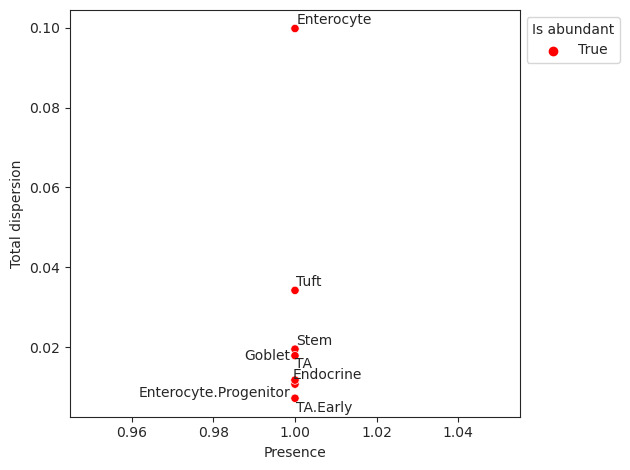

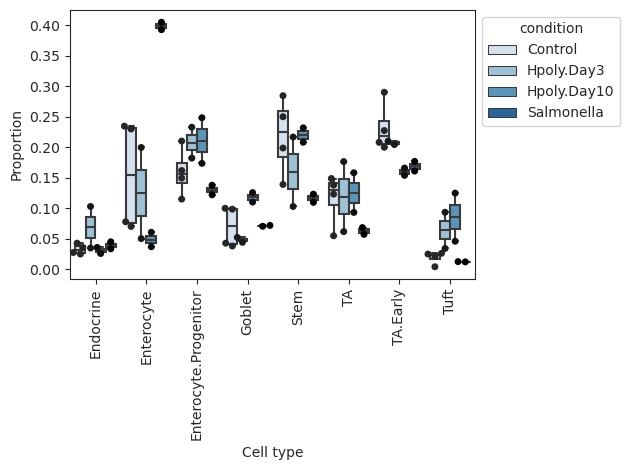

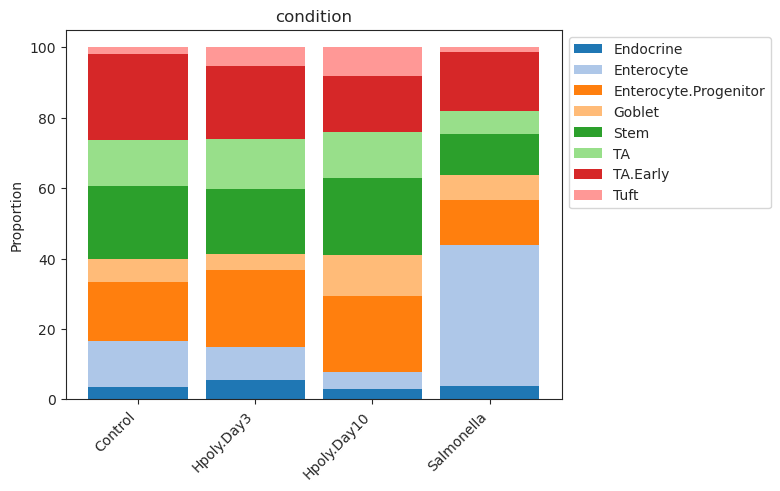

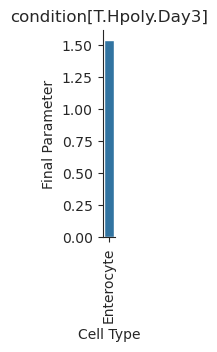

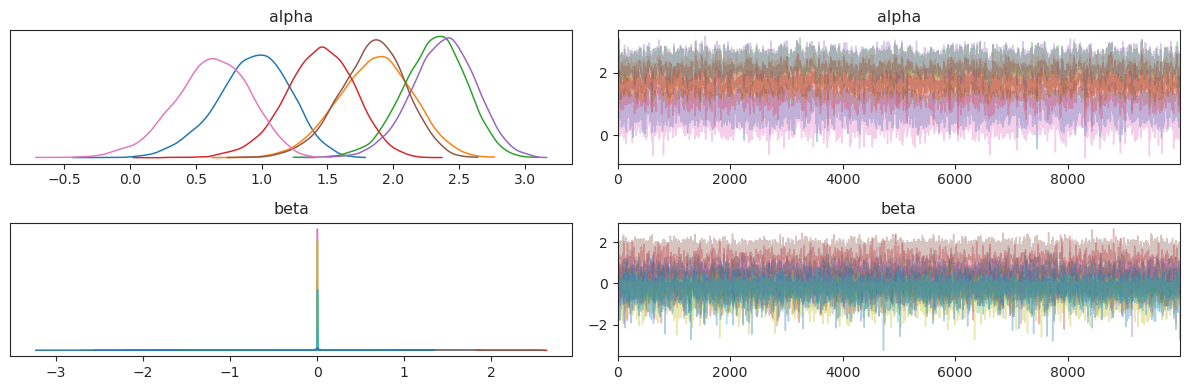

In [ ]:
oca = self.run_composition_analysis(est_fdr=0.05, generate_sample_level=True)